# Get started with ClickHouse

ClickHouse is an column-oriented SQL database management system for for online analytical processing (OLAP). In this tutorial you will:
1. Instal some Python packages for the database connection and data analysis/visualization
2. Connect to a sample ClickHouse system
3. Query a public dataset and generate some visualizations

### 1. Install Python packages
   - `clickhouse_connect` is a database driver for connecting ClickHouse to Python. It is also used to connect to Superset and Pandas.
   - `pandas` is a data analysis toolkit for Python.
   - `matpotlib` is a library for creating static and interactive visualiztions in Python.

In [31]:
import sys
!{sys.executable} -m pip install clickhouse_connect

In [32]:
!{sys.executable} -m pip install pandas
import pandas as pd

In [33]:
import matplotlib.pyplot as plt

### 2. Connect to ClickHouse
The ClickHouse system used in this tutorial is a public read-only system. Because it is publicly available the connection details are configured directly in this notebook. When using your own system you should configure the connection based on your security needs. At a minimum you should use a `.env` file. More information about this and other topics is linked at the end, but we suggest that you follow the tutorial first and then read more.

The connection details are host, port, username, andpassword. `clickhouse-connect` has more optional parameters to tune the connection, but the defaults are fine for the `play.clickhouse.com` system.

In [34]:
ch_host = "play.clickhouse.com"
ch_port = 443
ch_username = "play"
ch_password = ""

In [35]:
import clickhouse_connect
client = clickhouse_connect.get_client(
    host=ch_host, 
    port=ch_port,
    secure='true',
    username=ch_username, 
    password=ch_password)

### 3. Query a public dataset

The sample dataset contains data from 1995 to the current date, with a lag of about two months. The data gets updated in the public ClickHouse database regularly. This is a very simple query, some more interesting queries are available in the ClickHouse documentation and blogs.

To query ClickHouse with Python:
- Wrap your query in triple quotes to allow inclusion of line breaks
- Pass your query string to `client.query()`

To present the data in tabular format with some styling:
- Assign the `result_set` to a panda dataframe (df). The prices for the properties are averaged and trucated to 32 bit integers for presentation purposes.
- Two Matplotlib figures are generated from the dataframe:
  - A pie chart showing the ten most expensive districts in the UK
  - A table with the same data



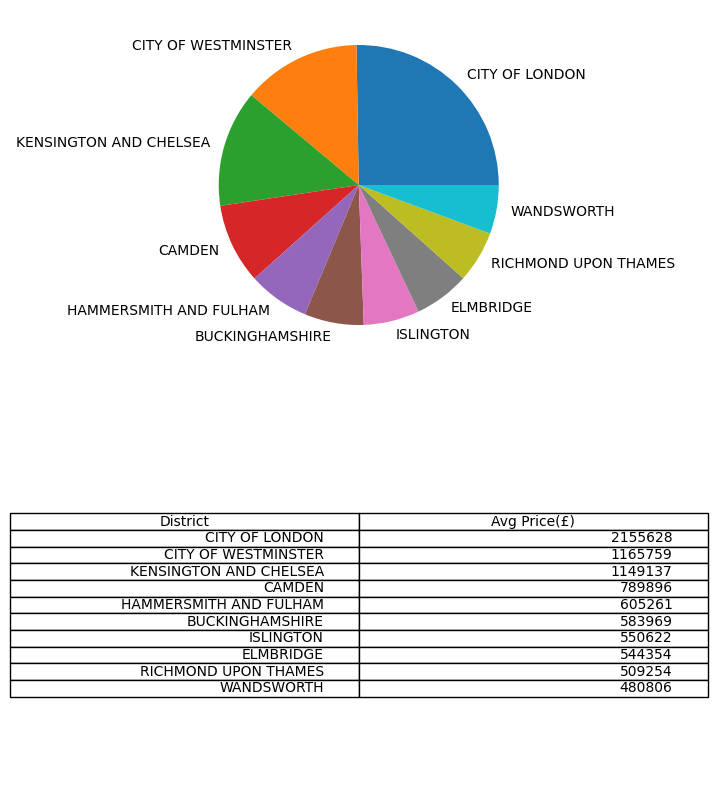

In [37]:
uk_prices = """SELECT district, toInt32(AVG(price)) AS avg_price
               from default.uk_price_paid 
               GROUP BY district 
               ORDER BY avg_price DESC LIMIT 10"""

result = client.query(uk_prices)

df = pd.DataFrame(result.result_set,
                  columns=['district',
                           'avg_price',
                          ]
                 )

fig, axs = plt.subplots(nrows=2, figsize=(9, 10), layout='none');

axs[0].pie(df.avg_price, labels=df.district);
axs[1].table(cellText=df.values, colLabels=["District", "Avg Price(£)"], loc='center');
axs[1].axis('off');

## References and further reading

More information on the data set, storing credentials, connecting to ClickHouse from Pand data analysis is available at the links.

- [`python-dotenv`](https://pypi.org/project/python-dotenv/) for storing credentials in a `.env` file
- [`clickhouse-connect`](https://pypi.org/project/clickhouse-connect/) package to connect to ClickHouse databases from Python
- [pandas](https://pandas.pydata.org/) data analysis toolkit information
- [Matplotlib](https://matplotlib.org/stable/) documentation
- The [UK Price Paid](https://www.gov.uk/government/statistical-data-sets/price-paid-data-downloads) dataset contains HM Land Registry data © Crown copyright and database right 2021. This data is licensed under the Open Government Licence v3.0.
- A [guide in the ClickHouse docs](https://clickhouse.com/docs/en/getting-started/example-datasets/uk-price-paid) showing how to ingest the data into ClickHouse
